In [ ]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from skimage import morphology
from skimage.morphology import opening
from skimage import filters
from skimage import transform
from functools import partial
from PIL import Image

# Preparing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from matplotlib import rcParams

# Evaluation
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, confusion_matrix
import pandas as pd 
import cv2, numpy as np
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

# Additionals
import os
from os import listdir
from os.path import isfile, join
import fyp2021p3_group00_functions as util
import warnings

In [ ]:
# LOAD PICTURES

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import time

In [5]:
import numpy as np

In [6]:
from skimage import morphology

In [7]:
import cv2 as cv2

In [5]:
# example dataset
pics = pd.read_csv("../data/new_dataset_metadata_raw_ex.csv", sep = ",")

#mask = pics["meta.clinical.diagnosis"] == "seborrheic keratosis"
mask = pics["meta.clinical.diagnosis"] == "actinic keratosis"
keratosis_df = pics[mask]

In [6]:
keratosis_df

,_id,name,meta.clinical.age_approx,meta.clinical.anatom_site_general,meta.clinical.benign_malignant,meta.clinical.clin_size_long_diam_mm,meta.clinical.diagnosis,meta.clinical.diagnosis_confirm_type,meta.clinical.family_hx_mm,meta.clinical.lesion_id,...,meta.clinical.sex,meta.acquisition.acquisition_day,meta.acquisition.blurry,meta.acquisition.color_tint,meta.acquisition.dermoscopic_type,meta.acquisition.hairy,meta.acquisition.image_type,meta.acquisition.marker_pen,meta.acquisition.pixelsX,meta.acquisition.pixelsY
0,5c95470cdb6d7c19d0bc2f7b,ISIC_0064587,85,head/neck,NaN,NaN,actinic keratosis,NaN,NaN,NaN,...,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1024,1024
1,5c95470cdb6d7c19d0bc2f99,ISIC_0064617,75,head/neck,NaN,NaN,actinic keratosis,histopathology,NaN,NaN,...,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1024,1024
2,5c95470ddb6d7c19d0bc2fa0,ISIC_0064624,55,head/neck,NaN,NaN,actinic keratosis,histopathology,NaN,NaN,...,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1024,1024
3,5c95470ddb6d7c19d0bc2fae,ISIC_0064638,60,anterior torso,NaN,NaN,actinic keratosis,histopathology,NaN,NaN,...,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1024,1024
4,5c95470fdb6d7c19d0bc2fe2,ISIC_0064690,70,head/neck,NaN,NaN,actinic keratosis,histopathology,NaN,NaN,...,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1024,1024


This operation takes several minutes, the raw dataset is already exist. Do you wish to continue: (Yes/No) yes

---It takes time --- 



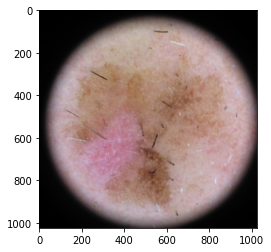

In [12]:
WARN = input("This operation takes several minutes, the raw dataset is already exist. Do you wish to continue: (Yes/No) ")

if WARN.lower().startswith("y"):
    print("\n---It takes time --- \n")
    for i in keratosis_df["name"]:
        #print(i)
        # Alternative: replace the non-lesion pixels
        im = plt.imread('../data/example_image/new_dataset/'+i+'.jpg')
        time.sleep(1)
        plt.imshow(im)
        
        #img2 = im.copy()
        #mask=plt.imread('../data/example_segmentation/sm/'+i+'_segmentation.png')
        #img2[mask==0] = 0
        #plt.imshow(img2)
        #image = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        #reshape = img2.reshape((img2.shape[0] * img2.shape[1], 3))
        # Find and display most dominant colors
        #cluster = KMeans(n_clusters=5).fit(reshape)
        #visualize = dominant_colors(cluster, cluster.cluster_centers_, i)
    #display(pics)
    #pics.to_csv('../data/processed/dominant_colors_raw.csv')
else:
    print("Cancelled operation")

In [8]:
# auto
i = "ISIC_0064690"
pic1 = plt.imread('../data/example_image/new_dataset/'+i+'.jpg')
i = "ISIC_0064690"
pic2 = plt.imread('../data/example_image/new_dataset/'+i+'.jpg')

NameError: name 'mymask1' is not defined

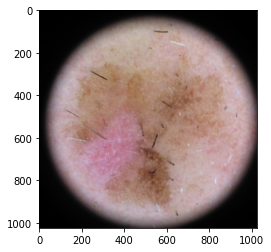

In [9]:
plt.imshow(pic1)
#plt.imshow(pic2)

# Alternative: replace the non-lesion pixels

img1 = pic1.copy()
img1[mymask1==0] = 0
  
# Display 
plt.imshow(img1)

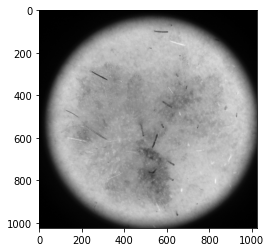

In [11]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(pic1)
plt.imshow(gray, cmap='gray')

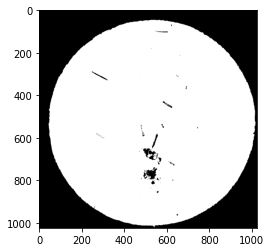

In [18]:
plt.imshow(gray, cmap='gray')
#print(gray)
mymask1 = gray > 90
mymask = gray < 130  #Pixels with lower intensities will be equal to 1 in the mask
#plt.imshow(mymask, cmap='gray')
plt.imshow(mymask1, cmap='gray')
#plt.imsave("mymask1.png",mymask1, cmap='gray')
#plt.imshow(im_revert, cmap='gray')
#print(mymask)
#plt.imsave("trial.png",mymask)


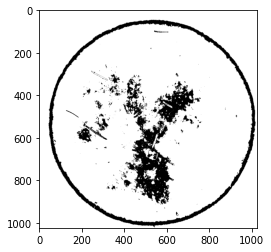

In [19]:
#plt.imshow(mymask1, cmap='gray')
plt.imshow(mymask, cmap='gray')
final_mask = (255-mymask1) + (255-mymask)
plt.imshow(final_mask, cmap='gray')

In [ ]:
cv2.HoughCircles(image, method, dp, minDist)

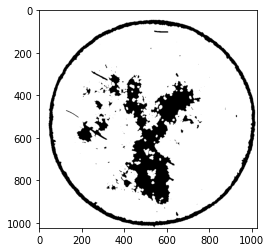

In [20]:
# There is some noise, we can get rid of it by morphological operators

from skimage.morphology import opening

# Opening = first EROSION, then DILATION 

# Erosion will get rid of hairs but also make the lesion smaller. 
# Dilation will restore the lesion (but not the hairs)

struct_el = morphology.disk(4)
opened = opening(final_mask, struct_el)

plt.imshow(opened, cmap='gray')

In [146]:
struct_el = morphology.disk(20)

print(struct_el)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


69.7113037109375


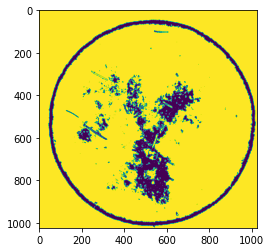

In [23]:
#Total size of the image
total = final_mask.shape[0] * mymask.shape[1] 

#Size of mask only
area = np.sum(mymask1)

#As percentage
print(area/total*100)

plt.imshow(final_mask)

730976
708260


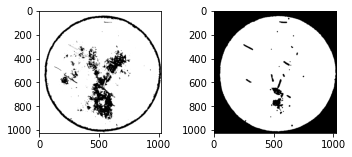

In [25]:
mask_eroded = morphology.binary_erosion(mymask1, struct_el)

# Show side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(final_mask, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()

# Verify it's smaller
print(area)
print(np.sum(mask_eroded))

249503351


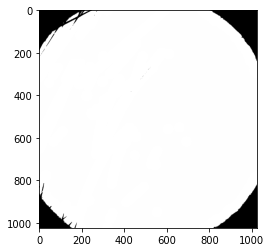

In [149]:
# Subtract the two masks from each other to get the border/perimeter
#mask=plt.imread('trial.png')
#mask=plt.imread('trial.png', cv2.IMREAD_GRAYSCALE)
mask = cv2.imread('mymask1.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(mask)
#print(mask)
#print(mask_eroded)
#print(mask.shape[2])
#print(mask[0])

image_perimeter = mask-mask_eroded

plt.imshow(image_perimeter, cmap='gray') #The perimeter is very thin so it might be difficult to see on the screen

#What is the length? 
print(np.sum(image_perimeter))


In [52]:
mymask
plt.imsave("trial.png",mymask, cmap='gray')

In [35]:
mask_eroded

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [166]:
# relocate_files

In [ ]:
import shutil
i= "ISIC_0000002.jpg"
o= "D:\ITU-BOOK\First Year Project\repo\fyp2021p03q10\data\example_image\new_dataset"+"\"+i
original = r'D:\ITU-BOOK\First Year Project\repo\fyp2021p03q10\data\example_image\new_dataset'+i
target = r'D:\ITU-BOOK\First Year Project\repo\fyp2021p03q10\data\example_image\new_dataset\only_melanoma\'+i
shutil.move(original,target)

In [174]:
target = 'D:\ITU-BOOK\First Year Project\repo\fyp2021p03q10\data\example_image\new_dataset"\\"'